<a href="https://colab.research.google.com/github/Dee-Olulo/FUTURE_DS_01/blob/master/TitanicEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#**Titanic Survival Analysis: An Exploratory Data Analysis (EDA) Journey**

## Description:
In this notebook, we delve into the Titanic dataset to uncover insights about the factors influencing passenger survival rates. Through a series of visualizations and statistical analyses, we explore the impact of socio-economic status, gender, and age on survival outcomes. Key findings include the higher survival rates of first-class passengers, the prioritization of women and children during evacuation, and the age distribution's role in survival likelihood. This comprehensive EDA provides a clear understanding of the historical data and highlights significant patterns that shaped the tragic event.

## **Data Understanding**
**Dataset Overview**
- Rows: 891 (representing passengers)
- Columns: 12 (representing variables that may contribute to survival prediction)

**Dataset Variables**

- *Survival:* Target variable, indicating whether a passenger survived or not (0 = No, 1 = Yes).
- *Pclass:* Socio-economic status of the passenger. It's a proxy for wealth and class division.
1 = Upper class
2 = Middle class
3 = Lower class
- *Sex:* Gender of the passenger (male/female).
- *Age*: Age of the passenger
- *SibSp:* Number of siblings or spouses aboard with the passenger. This gives insights into family structure and travel companions.
- *Parch:* Number of parents or children aboard with the passenger.
- *Ticket:* Passenger's ticket number. This is a unique identifier but may have limited relevance for survival prediction unless linked to ticket prices or groups.
- *Fare:* The fare paid by the passenger. This could relate to the passenger's
class or socio-economic status.
- *Cabin:* Cabin number of the passenger. Not all passengers have a recorded cabin, leading to missing data.
- *Embarked:* Port where the passenger boarded the Titanic.
C = Cherbourg
Q = Queenstown
S = Southampton

### **Data Preview and Cleaning**
- We start by importing Important libraries such as Numpy, Pandas, matplotlib.pyplot, seaborn which are data manipulation libraries.

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
#mounting the google drive to access the files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#loading the data
df= pd.read_csv('/content/drive/MyDrive/Titanic/train.csv')

In [ ]:
#data preview of the first five columns
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#preview of the last five columns in our dataset
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
#concise summary of the dataset showing the toal rows and columns, datatypes of each column and non null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- The dataset has a total of 12 columns. 5 columns consists of interger datatype (PassengerId, Survived, Pclass, SipSp, Parch). 5 columns consist of object datatype (Name, Sex, Ticket, Cabin, Embarked) an d2 columns have float datatype ( Age, Fare)
- The following columns have missing values; Age, Cabin and Embarked


In [ ]:
#dimensions of the data
df.shape

(891, 12)

- The output above tells us that out dataframe has 891 rows and 12 columns

In [ ]:
#checking the datatypes of each column
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [ ]:
#checking for duplicates in the dataframe
df.duplicated().sum()

0

- We have no duplicated values in our data
-Next we check the percentage of null values of each column in our dataset

In [ ]:
#checking the percentage of null values in each column
df.isna().sum()/len(df)*100

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


- Age – About 19.87% of the entries in the Age column are missing. This is significant, as age could be an important factor in analysis, especially when considering survival rates.Missing values will be replced by the  mean.

- Cabin – A very high percentage of missing values (77.10%) is observed in the Cabin variable. Due to this significant missing values the column will be dropped.

- Embarked – The Embarked variable has a small percentage of missing values (0.22%), which can be addressed easily through imputation using the mode since te column contains non numerical values.
- Aditionally, the PasssengerId, Ticket and Name columns will be dropped because they wont be helpful in conducting EDA.

In [ ]:
#filling the missing values in the age column with the mean
df['Age'] = df['Age'].fillna(df['Age'].mean())
#dropping the cabin column from our dataset
df = df.drop(columns= ['Cabin', 'PassengerId', 'Ticket', 'Name'])
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

-  Changing the datatype of the age column to intger so that the values appear as whole numbers rather than decimals which isnot ideal.

In [ ]:
#converting the datatype of age column to int
df['Age']= df.Age.astype(int)

In [ ]:
#statistics summary of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.0,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.0,2.0000,3.0000,3.0,3.0000
Age,891.0,29.544332,13.013778,0.0,22.0000,29.0000,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.0,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.0,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


- The Age and Fare columns have high standard deviations meaning that these columns definitely have outliers.

In [ ]:

zero_age_count = (df['Age'] == 0).sum()
print(f"Number of entries where Age is 0: {zero_age_count}")


Number of entries where Age is 0: 7


### **Data** **Visualisation**
- The Boxplots below will help us clearly see the distribution of outliers in the numerical variables.

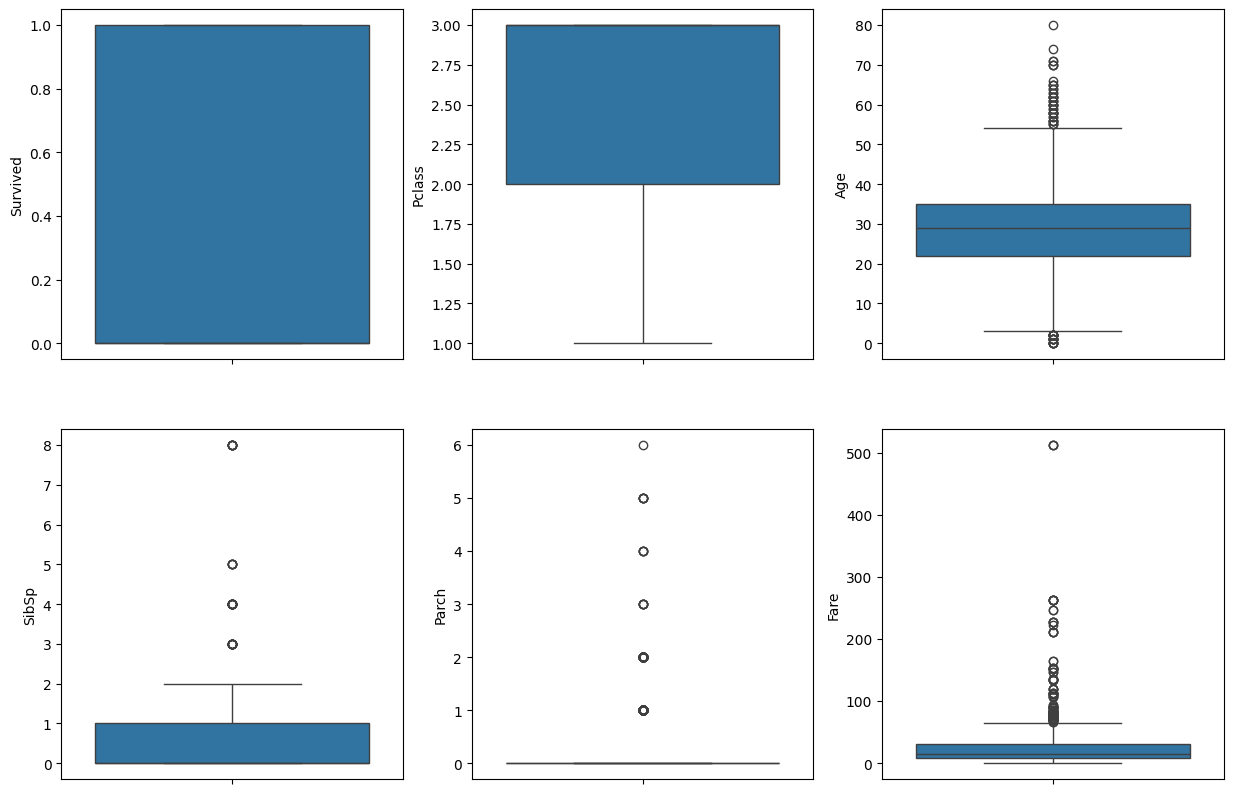

In [ ]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include='number').columns

fig, axes= plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i, col in enumerate(numerical_cols):
    # Calculate the row and column index for the subplot
    row = i // 3  # Integer division to determine the row
    col_num = i % 3  # Modulo operation to determine the column
    sns.boxplot(df[col], ax=axes[row, col_num]) # Access the subplot using [row, col] indexing

- Although the Pclass and Survived columns consist of numerical values, they represent different categories respectively thats why they do not have outliers.
-The Age, SibSp, and ParCh columns have significant number of outliers but we will not remove them because they are realistic as they represent real world data and do not seem so extreme.
-The outliers present in the fare column are extreme therfore we continue to analyse them.

In [ ]:
# Get the Fare values for passengers where Pclass is equal to 1
first_class_fares = df[df['Pclass'] == 1]['Fare']

# Display the result
first_class_fares.describe()

,Fare
count,216.000000
mean,84.154687
std,78.380373
min,0.000000
25%,30.923950
50%,60.287500
75%,93.500000
max,512.329200


- Removing outliers from the fare column


In [ ]:
#replace the fare of passengers who paid 0  with the median price
# Calculate the median fare, ignoring fares that are 0
median_fare = df[df['Fare'] > 0]['Fare'].median()
# Replace the fares that are 0 with the median fare
df.loc[df['Fare'] == 0, 'Fare'] = median_fare
# drop the row whose fare was 512
df = df.drop(df[df['Fare'] == 512.3292].index)

#### **Univariate Analysis**

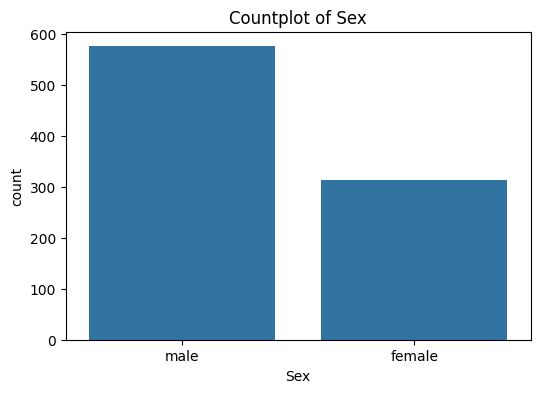

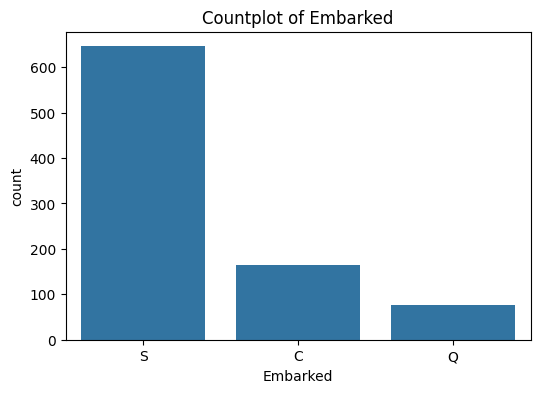

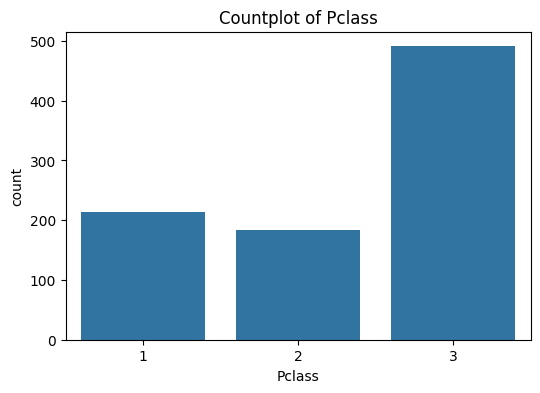

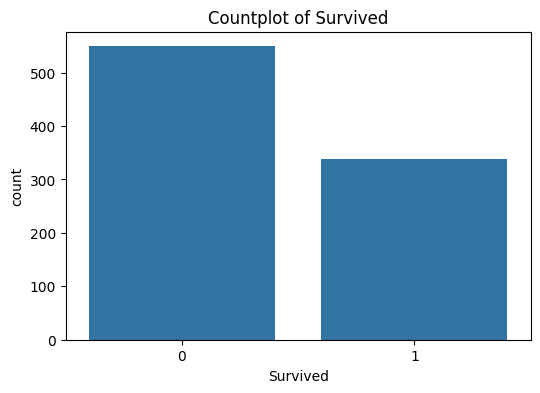

In [ ]:
categorical_cols = ['Sex', 'Embarked', 'Pclass', 'Survived']
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col])
    plt.title(f"Countplot of {col}")
    plt.show()

**Observations**

Graph 1

*   Male Count: The majority of passengers are male, with the count close to 600.
*   Female Count: There are fewer female passengers, with the count around 300.

Graph 2

- Most passenger boarded/embarked from the Southampton Port.

Graph 3

- Pclass 3: The majority of passengers, around 500, were in the third class, indicating that a large portion of the passengers traveled in the lowest class.
-Pclass 1: Around 200 passengers traveled in the first class, representing a smaller, wealthier group.
-Pclass 2: The second class had slightly fewer passengers than the first class, with just under 200.

Graph 4

- Most of the passengers did not survive from the titanic.0 represents the non survivors while 1 represents the survivors.




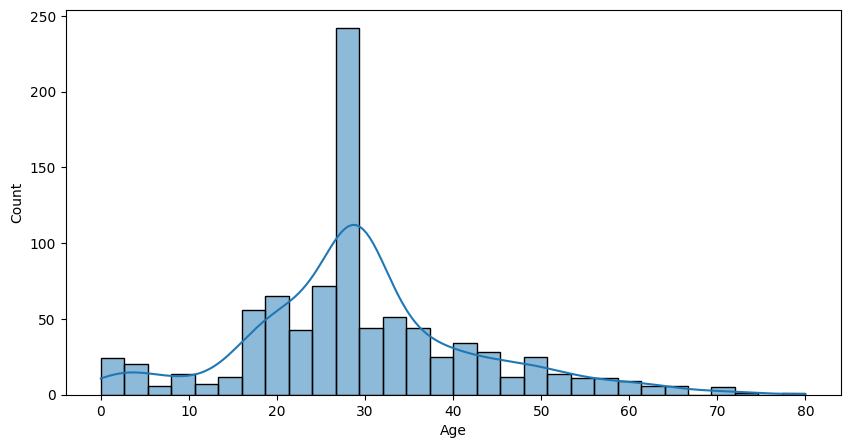

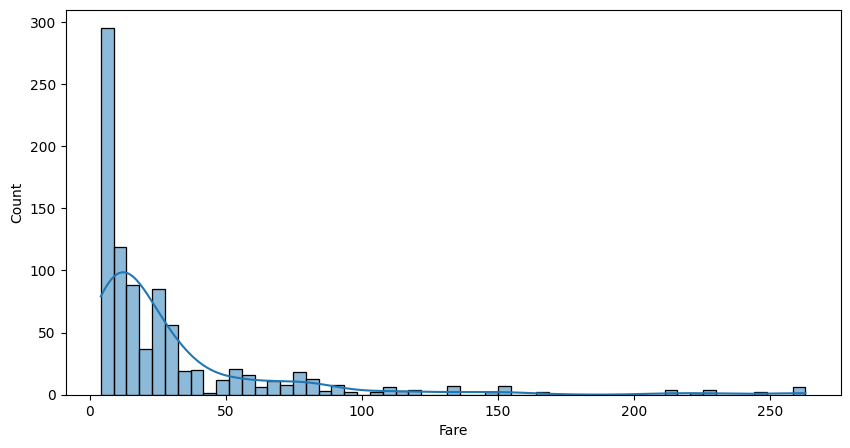

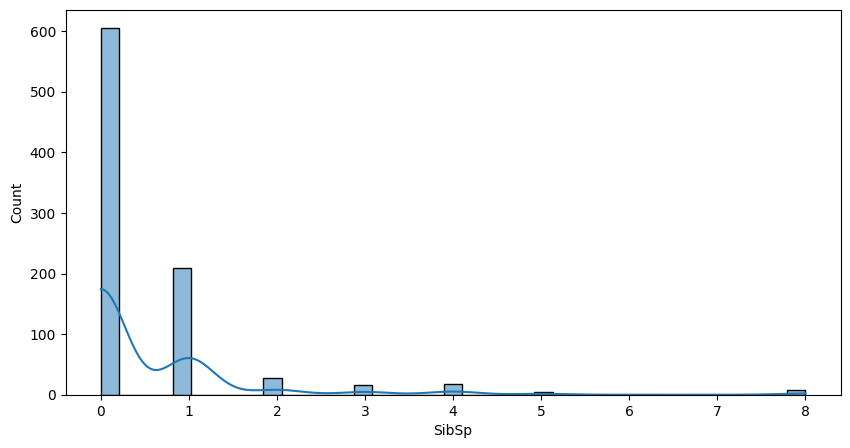

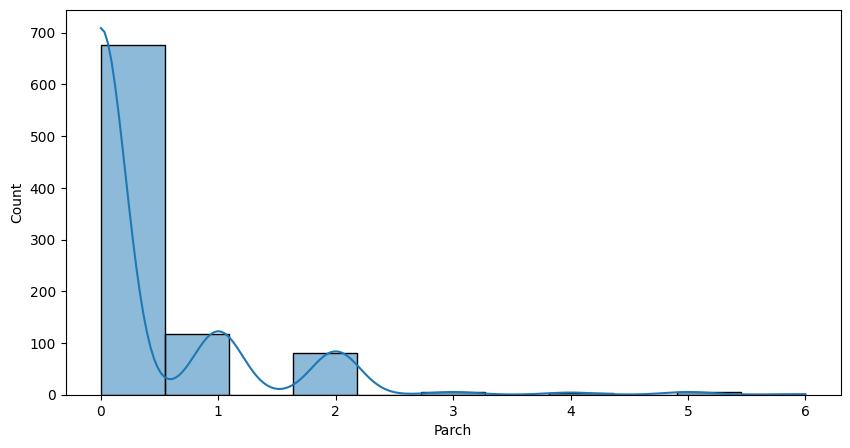

In [ ]:
#distribution of different age groups that boarded the titanic
numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']
for col in numerical_cols:
    fig, ax= plt.subplots(figsize=(10,5))
    sns.histplot(x=df[col], kde=True, ax=ax)
    plt.show()

 **Observations**
- Graph 1: It shows that young adultsaged between 20 and 30 were the most represented age group on board
- Graph 2: Most people that boarded the titanic paid less than 50 pounds for the fare, meaning they were from the middle class.
- Graph 3: The tallest bar is at “Parch” value 0, with a count close to 700. This indicates that most passengers did not have any parents or children with them on board.
There are smaller peaks at “Parch” values 1 and 2, showing that some passengers had one or two parents or children with them.
The counts for “Parch” values 3 through 6 are minimal, indicating very few passengers had three or more parents or children with them.

#### Bivariate Analysis


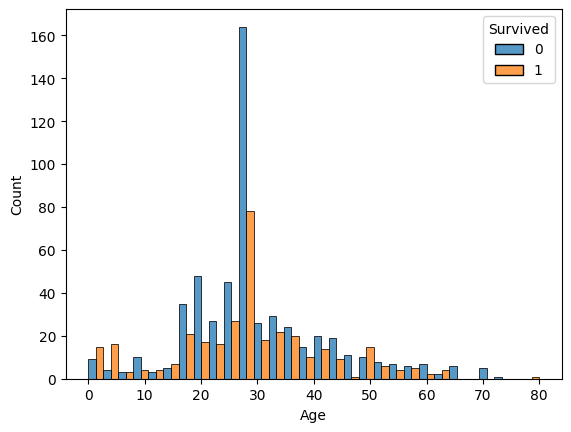

In [ ]:
#the survival rate of different age groups
sns.histplot(x='Age',data=df, hue= 'Survived', multiple='dodge');

**Observations**
- The orange bars are generally shorter, suggesting fewer survivors across most age groups.
- The age group with the highest count of non-survivors appears to be around 20-30 years, similar to the previous age distribution analysis.

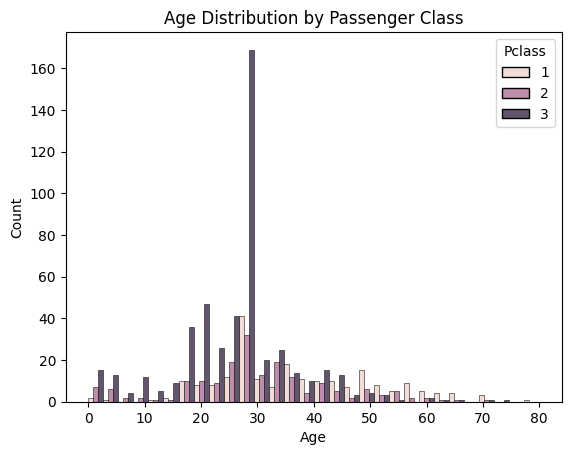

In [ ]:
#scatter plot
sns.histplot(x='Age', data=df, hue='Pclass', multiple='dodge');
#title
plt.title('Age Distribution by Passenger Class');

**Observations**

- Most of the elder people between age(50- 80) boarded the first class ie.Pclass 1

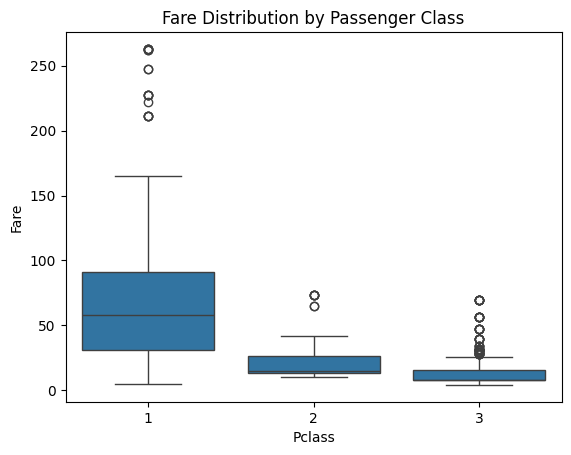

In [ ]:
#distribution of fare per pclass
sns.boxplot(x='Pclass', y='Fare', data=df);
#title
plt.title('Fare Distribution by Passenger Class');

**Observations**
-  first-class passengers paid significantly more for their tickets, with a wider range of fares
-Third-class passengers (Pclass 3) generally paid lower fares, but there were more outliers, indicating some variability.

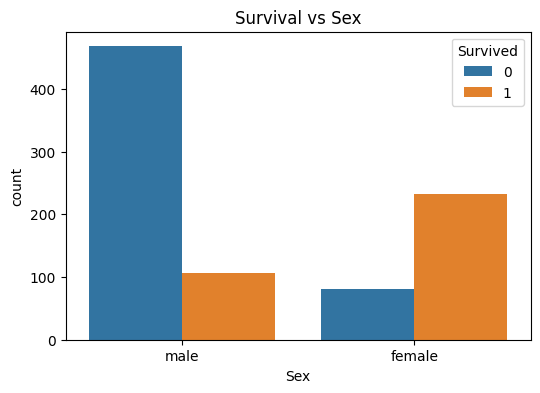

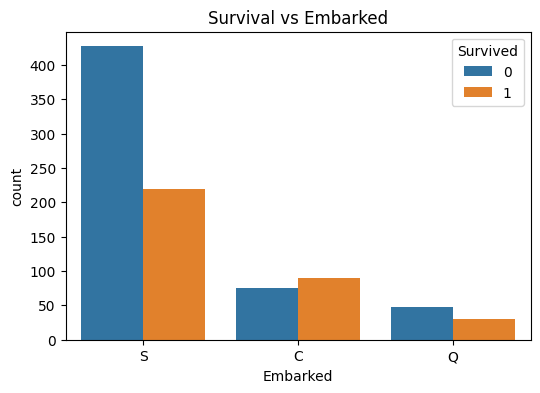

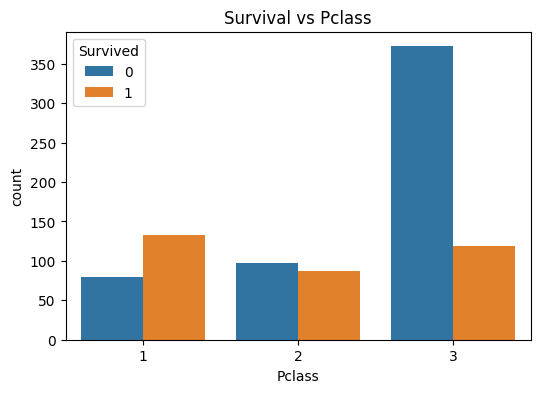

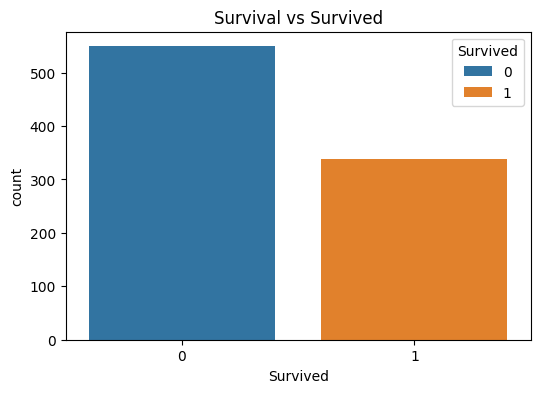

In [ ]:
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue='Survived', data=df)
    plt.title(f"Survival vs {col}")
    plt.show()

**Observations**

Graph 1
- For males, the blue bar is significantly taller than the orange bar, indicating that more males did not survive compared to those who did.
-For females, the orange bar is taller than the blue bar, indicating that more females survived compared to those who did not.

Graph 2
- Southampton (S): The highest number of both survivors and non-survivors embarked from Southampton. However, the count of non-survivors is significantly higher than survivors.
-Cherbourg (c): The number of survivors is slightly higher than non-survivors, indicating a better survival rate for passengers who embarked from Cherbourg.
-Queenstown (Q): The counts for survivors and non-survivors are closer, with a slight edge for non-survivors.

Graph 3
- First Class (Pclass 1): The number of survivors is higher than the number of non-survivors, indicating a higher survival rate for first-class passengers.
-Second Class (Pclass 2): The counts for survivors and non-survivors are closer, but there are still more non-survivors than survivors.
-Third Class (Pclass 3): The number of non-survivors is significantly higher than the number of survivor, indicating a lower survival rate for third-class passengers.

In [ ]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1


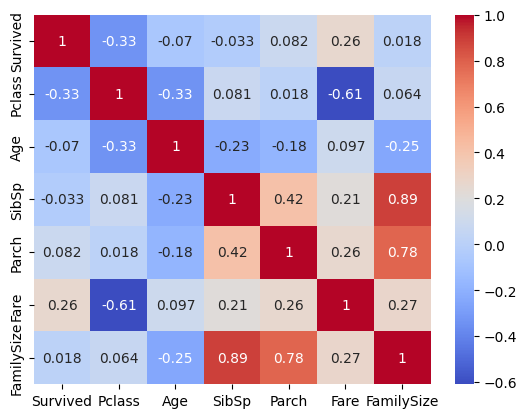

In [ ]:
numerical_vars =df.select_dtypes(include='number')

sns.heatmap(numerical_vars.corr(), annot=True, cmap='coolwarm')
plt.show()

**Observations**

Survived:
- Positively correlated with ‘Fare’ and ‘FamilySize’.
-Negatively correlated with ‘Pclass’ and ‘Age’.

Pclass:
- Negatively correlated with ‘Fare’ and ‘FamilySize’.
- Positively correlated with ‘Age’.

Age:
- Negatively correlated with ‘SibSp’ and ‘Parch’.

SibSp and Parch:
- Positively correlated with each other and with ‘FamilySize’.

Fare:
- Positively correlated with ‘FamilySize’.

#### Multivariate Analysis


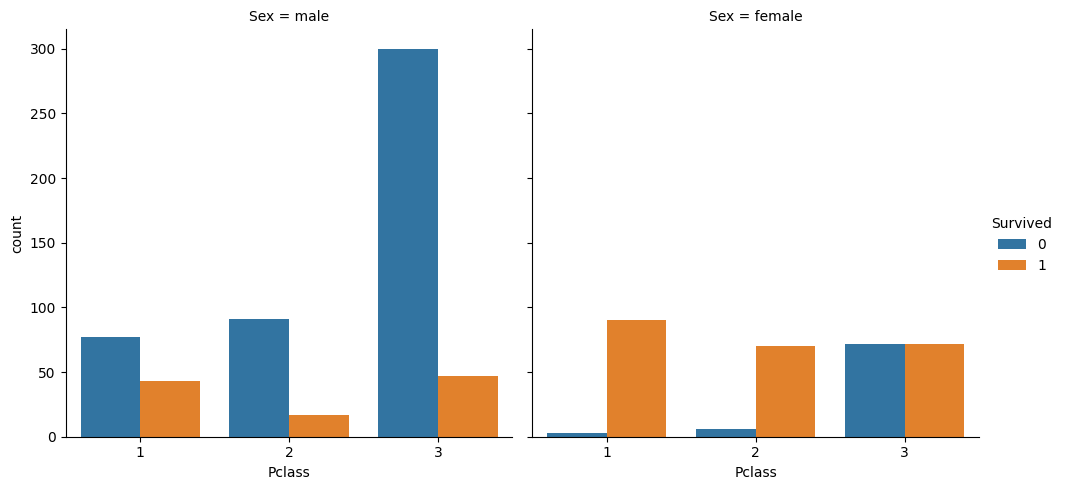

In [ ]:
sns.catplot(x='Pclass', hue='Survived', col='Sex', kind='count', data=df)
plt.show()


**Observations**
- It shows that females had a higher likelihood of survival across all classes, especially in first class, while males in third class had the lowest survival rate.

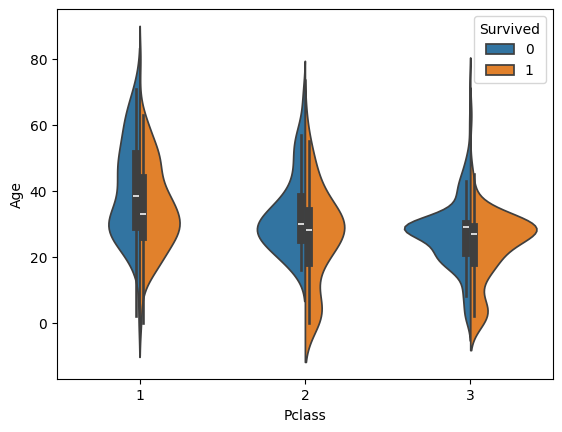

In [ ]:
sns.violinplot(x='Pclass', y='Age', hue='Survived', split=True, data=df)
plt.show()


 **Observations**
 - It shows that first-class passengers had a more diverse age range with a higher survival rate, while third-class passengers were generally younger with a lower survival rate

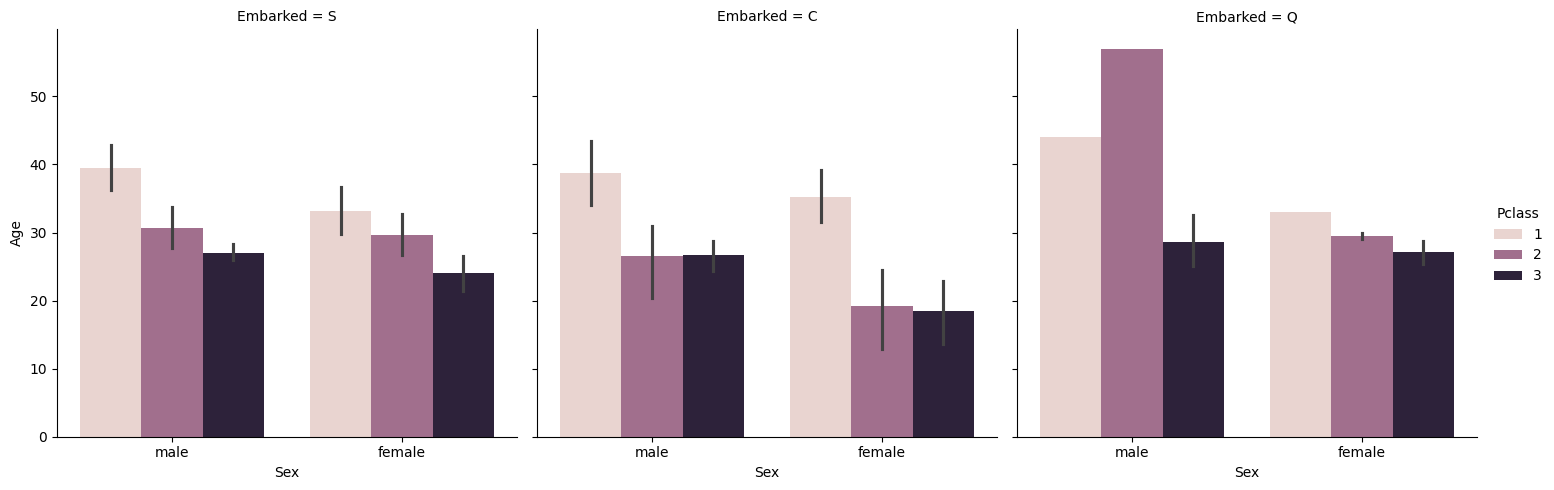

In [ ]:
sns.catplot(x='Sex', y='Age', hue='Pclass', col='Embarked', kind='bar', data=df)
plt.show()


**Observations**
- This visualization highlights the differences in survival rates based on both sex and embarkation points, showing that third-class passengers, especially males, had lower survival rates across all embarkation points. Females generally had higher survival rates, particularly those who embarked from Cherbourg.

### **Conclusion**
1. Survival Rates by Passenger Class (Pclass):
- First-class passengers had the highest survival rates, while third-class passengers had the lowest. This indicates a significant socio-economic factor influencing survival, with wealthier passengers having better access to lifeboats and safety measures.
2. Impact of Sex on Survival:
- Females had a higher survival rate compared to males across all passenger classes. This suggests that women were given priority during the evacuation process, aligning with the “women and children first” protocol.
3. Age Distribution and Survival:
- Younger passengers, particularly children, had higher survival rates compared to older passengers. This trend was more pronounced in first and second classes, where younger passengers were more likely to survive.
4. Family Size
- People travelling with smaller(medium) families had a higher chances of surviving in comparission to people with large families and the one travelling alone.